<a href="https://colab.research.google.com/github/nishithewel/ID5059GroupProject/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/nishithewel/ID5059GroupProject.git

fatal: destination path 'ID5059GroupProject' already exists and is not an empty directory.


### Downloading the Data from kaggle.

In [1]:

!pip install -q kaggle
from google.colab import files
files.upload()
!rm -rf sample_data
!mkdir  -p /root/.kaggle/
!mv kaggle.json  /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!ls -lart /root/.kaggle/
!kaggle competitions download -c 'ieee-fraud-detection'
!mkdir data
!mv ieee-fraud-detection.zip data/
!unzip data/ieee-fraud-detection.zip -d data/

KeyboardInterrupt: ignored

## Introduction to the Dataset


### Team Members
- Nishithe Welandawe - naw4
- Joseph Edwards - jde1
- Anli 
Fill in please

### Installs and Imports

In [3]:
! pip install imblearn

In [1]:
import os
os.chdir('/content/ID5059GroupProject')
import numpy as np 
import pandas as pd
from google.colab import drive
from imblearn import over_sampling
from preprocess import preprocess
# os.chdir('/content/ID5059GroupProject')

from model_stack import stack_models



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the dataset
- Upload the unzipped datasets to your google drive
- Update root_dir with the folder containing the datasets

In [2]:
### You need to change these codes to load your dataset
#if youre files are stored in google drive do this
DRIVE_STORE = True
if DRIVE_STORE == True:
  drive.mount('/content/drive') 
  root_dir = '/content/drive/MyDrive/Python/ID5059-GroupProject/ieee-fraud-detection/' #for nish
  
else:
  root_dir = '/content/ID5059GroupProject/data/'
# os.chdir(root_dir)

test_iden = pd.read_csv(root_dir + 'test_identity.csv',)
test_tran = pd.read_csv(root_dir +'test_transaction.csv',)
train_iden = pd.read_csv(root_dir +'train_identity.csv',)
train_tran = pd.read_csv(root_dir +'train_transaction.csv',)


In [ ]:
train_iden.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [3]:
train = pd.merge(train_tran, train_iden, on = 'TransactionID', how = 'left')
test = pd.merge(test_tran, test_iden, on = 'TransactionID', how = 'left')

#Run this otherwise might cause ram overflows
v_cols = [col for col in train.columns if 'V' in col]
# lets ignore the v columns for the time being
train.drop(v_cols,axis =1, 
                inplace = True)

In [7]:
del train_tran, train_iden

In [ ]:
train.info()

## EDA
We perform basic analysis on the data.
- Visualise predictor distribution.
- Correlation


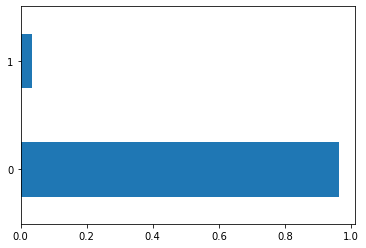

In [16]:
train['isFraud'].value_counts(
    normalize = True).plot(kind= 'barh')

We find very few instance of Fraud. Consider Class Balancing.

## Feature Preproccessing

Systematically, deal with features by considering the following,
- 'M' columns
- 'D' columns - these are fine all numerical
- 'C' columns - numerical except for 4,6

We deal with categorical variables using dummy vars.

In [6]:
#switch to Sklearn later
train = preprocess(train)

train = pd.get_dummies(train, 
                       columns = ['card4','card6','ProductCD','M4'],
               dummy_na = True,
              #  drop_first =True               
              )

#the M columns look like true or false lets convert them to 1, 0 
m_cols = [col for col in train.columns if 'M' in col]
# m_cols.head()
train[m_cols] = train[m_cols].replace(dict(T=1,F=0))

### Feature Selection
What features are we dropping and why?

In [4]:
# v_cols = [col for col in train.columns if 'V' in col]
# # lets ignore the v columns for the time being
# train.drop(v_cols,axis =1, 
#                 inplace = True)

### Column Imputation
How are we dealing with NaN/Missing/Infinite Values?

### Feauture Cleaning
The data contains outliers, which require cleaning.

### Feature engineering (Creation)
Wrapped as Preprocessor function to be implementd after test train split.

### Class Balancing

In [11]:
train = train._get_numeric_data()
X_train, y_train = train.drop('isFraud',axis = 1), train['isFraud']
# oversample = over_sampling.SMOTE()
#X_train, y_train = oversample.fit_resample(X_train, y_train)

## Model Creation & Fitting


### Individiual models

In [12]:
#naw4

# train.drop(['P_emaildomain', 'R_emaildomain'],axis =1 ,inplace = True)
from sklearn.metrics import accuracy_score

import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
preds = xgb_cl.predict(X_train)
accuracy_score(y_train, preds)

0.9727740711890812

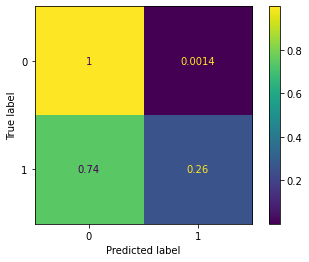

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, preds,normalize='true')

In [ ]:
#jde1
from sklearn import datasets, svm
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import LinearSVC
train.drop(['P_emaildomain', 'R_emaildomain'],axis =1 ,inplace = True)

percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
high_na = list(missing_value_df.loc[missing_value_df['percent_missing']>0.2]['column_name'])

j_train = train.drop(high_na, axis = 1)
j_train.dropna(inplace=True)

X_train, y_train = j_train.drop('isFraud',axis = 1), j_train['isFraud']

# imp = SimpleImputer(strategy="most_frequent")
# j_train = imp.fit_transform(j_train)
clf = svm.LinearSVC()

feature_map_nystroem = Nystroem(gamma=.2,
                                 random_state=1,
                                 n_components=300)
data_transformed = feature_map_nystroem.fit_transform(X_train)
clf.fit(data_transformed, y_train)
LinearSVC()
preds = clf.predict(data_transformed)
accuracy_score(y_train, preds)

KeyError: ignored

In [ ]:
preds = clf.predict(data_transformed)
accuracy_score(y_train, preds)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, preds,normalize='true')

### Model Ensembling

In [ ]:
stack_models(('Nishi', xgb_cl))